# Event Plots r-3628

A NB template to ilustrate how to examine the features of events

In [23]:
import datetime
print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

2017-04-12 22:40:14


In [24]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [25]:
import sys
import os
import time
import tables as tb
import numpy as np
import matplotlib.pyplot as plt

In [26]:
from invisible_cities.database import load_db

In [27]:
import invisible_cities.core.mpl_functions as mpl
import invisible_cities.reco.tbl_functions as tbl
from invisible_cities.reco.params import S12Params, ThresholdParams
from   invisible_cities.core.system_of_units_c import units

In [28]:
from invisible_cities.core.mpl_functions import plot_pmt_waveforms, plot_pmt_signals_vs_time_mus, \
              plot_signal_vs_time_mus

In [29]:
from invisible_cities.reco.pmaps_functions import plot_s12

In [30]:
from icaro.core.event_pmaps import EventPmaps, print_s12, print_s2si

### Run Parameters

In [31]:
run_number = 3628

In [32]:
DataPMT = load_db.DataPMT(run_number)
DataSiPM = load_db.DataSiPM(run_number)
xs = DataSiPM.X.values
ys = DataSiPM.Y.values

In [33]:
RWF_file = os.path.join(os.environ['IC_DATA'],
                        'LSC/wvfms/{}/run_{}.gdc1next.next-new.000.rd_{}.root.h5'.format(run_number, 
                                                                                             run_number,
                                                                                             run_number))
print('RWF file = {}'.format(RWF_file))

RWF file = /Users/jjgomezcadenas/Projects/ICDATA/LSC/wvfms/3628/run_3628.gdc1next.next-new.000.rd_3628.root.h5


In [34]:
h5rwf = tb.open_file(RWF_file,'r')

In [35]:
pmtrwf, pmtblr, sipmrwf = tbl.get_vectors(h5rwf)

In [36]:
NEVT, NPMT, PMTWL = pmtrwf.shape
NEVT, NSIPM, SIPMWL = sipmrwf.shape
print("""
        Number of events in file = {}
        Number of PMTs = {}
        PMTWL = {}
        Number of SiPMs = {}
        SiPMWL = {}
      """.format(NEVT, NPMT, PMTWL,NSIPM, SIPMWL))


        Number of events in file = 82
        Number of PMTs = 12
        PMTWL = 52000
        Number of SiPMs = 1792
        SiPMWL = 1300
      


In [76]:
s1par  = S12Params(tmin=0*units.mus, tmax=649*units.mus, lmin=5, lmax=30, stride=4, rebin=False)
s2par = S12Params(tmin=649*units.mus, tmax=700*units.mus, stride=80, lmin=80, lmax=20000, rebin=True)
thr    = ThresholdParams(thr_s1=5 * units.pes,  thr_s2=3 *units.pes,
                        thr_MAU = 3 * units.adc, thr_sipm = 3.5 * units.pes,
                        thr_SIPM = 30 * units.adc)

In [77]:
epm = EventPmaps(run_number, s1par, s2par, thr, verbose=True)

In [39]:
event=0
epm.calibrated_pmt_and_csum(event, pmtrwf)

45469.688057527288

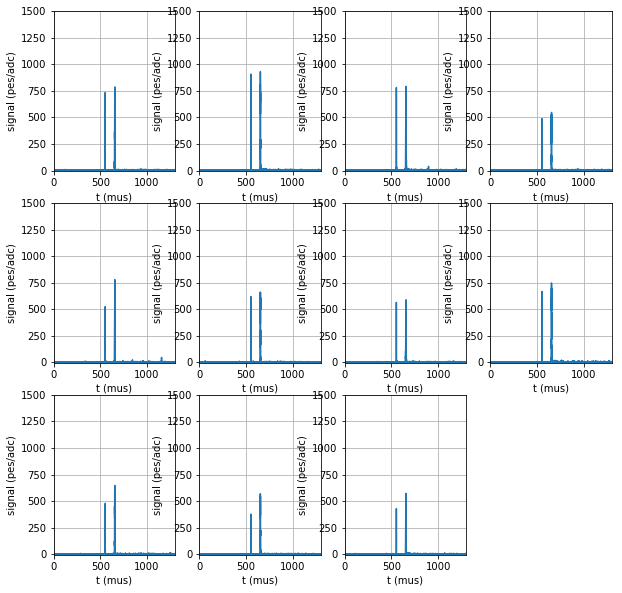

In [40]:
plot_pmt_signals_vs_time_mus(epm.CWF,
                                 epm.P.pmt_active,
                                 t_min      =    0,
                                 t_max      = 1300,
                                 signal_min =    -5,
                                 signal_max =  1500)

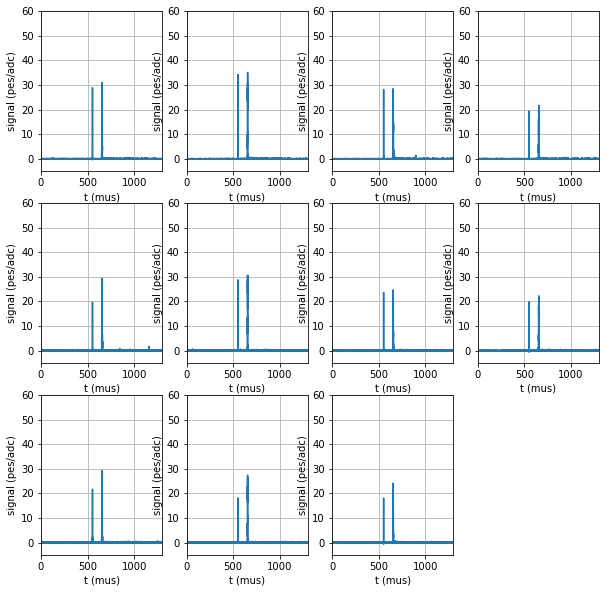

In [41]:
plot_pmt_signals_vs_time_mus(epm.CAL_PMT,
                             epm.P.pmt_active,
                             t_min      =    0,
                             t_max      = 1300,
                             signal_min =    -5,
                             signal_max =  60)

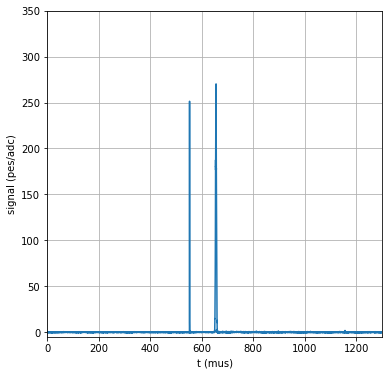

In [42]:
plot_signal_vs_time_mus(epm.csum, 
                            t_min=0, 
                            t_max=1300, 
                            signal_min=-5, 
                            signal_max=350)

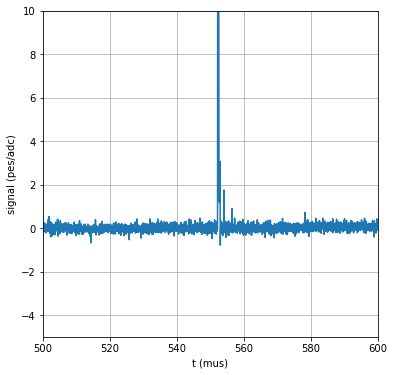

In [49]:
plot_signal_vs_time_mus(epm.csum, 
                            t_min=500, 
                            t_max=600, 
                            signal_min=-5, 
                            signal_max=10)

In [43]:
epm.find_s1()

number of peaks = 1
S12 number = 0, samples = 15 sum in pes =1460.681762934654
time vector (mus) = [ 552.175  552.2    552.225  552.25   552.275  552.3    552.325  552.35
  552.375  552.4    552.425  552.45   552.475  552.5    552.525]
energy vector (pes) = [   6.52499172   33.92877525   94.81646978  174.32572818  236.02571355
  251.35789528  220.25970713  164.5818982   108.11599883   65.71698822
   40.81730943   26.58740038   17.10971795   13.18968674    7.32348229]


1

In [44]:
epm.find_s2()

number of peaks = 1
S12 number = 0, samples = 10 sum in pes =43412.793009329136
time vector (mus) = [ 650.5125  651.5125  652.5125  653.5125  654.5125  655.5125  656.5125
  657.5125  658.5125  659.325 ]
energy vector (pes) = [  428.2982695   1677.8069126   4133.54961266  7493.28561113  9603.20514014
  9439.43352835  6405.30461369  3098.35210683   958.75223667   174.80497774]


1

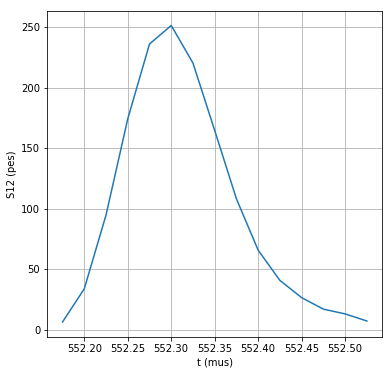

In [45]:
plot_s12(epm.S1)

In [46]:
epm.s1f

{0: S12Features(tmin=552175.0, tmax=552525.0, tpeak=552300.0, etot=1460.681762934654, epeak=251.35789527613105, width=350.0)}

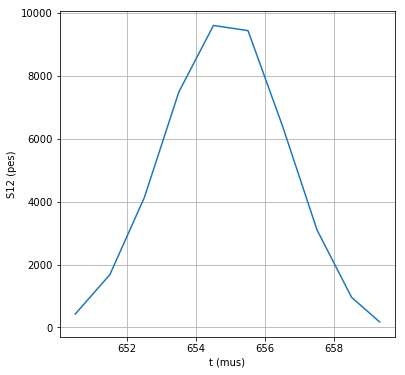

In [47]:
plot_s12(epm.S2)

In [50]:
epm.s2f

{0: S12Features(tmin=650512.5, tmax=659325.0, tpeak=654512.5, etot=43412.793009329136, epeak=9603.2051401436838, width=8812.5)}

In [51]:
epm.find_ns1()

11

In [52]:
dt = epm.s2f[0].tpeak - epm.s1f[0].tpeak

In [53]:
dt/units.mus

102.21250000000001

In [54]:
event=1
epm.calibrated_pmt_and_csum(event, pmtrwf)

38895.386923608356

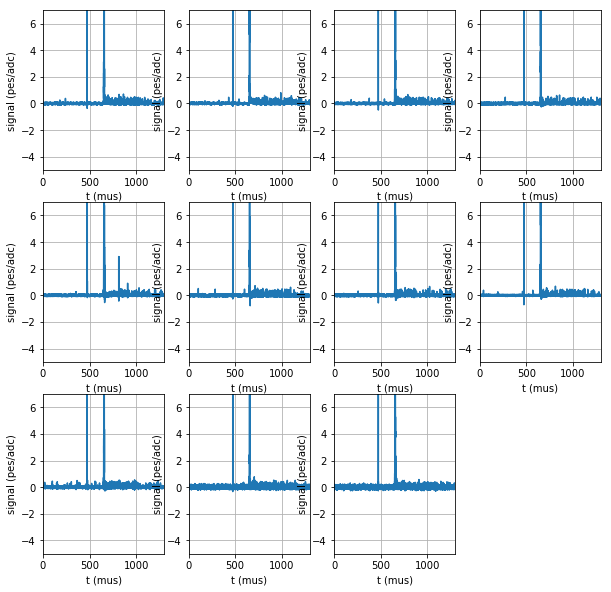

In [55]:
plot_pmt_signals_vs_time_mus(epm.CAL_PMT,
                             epm.P.pmt_active,
                             t_min      =    0,
                             t_max      = 1300,
                             signal_min =    -5,
                             signal_max =  7)

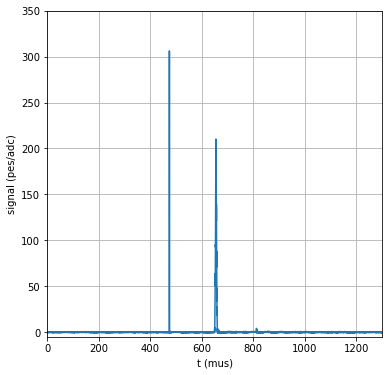

In [57]:
plot_signal_vs_time_mus(epm.csum, 
                            t_min=0, 
                            t_max=1300, 
                            signal_min=-5, 
                            signal_max=350)

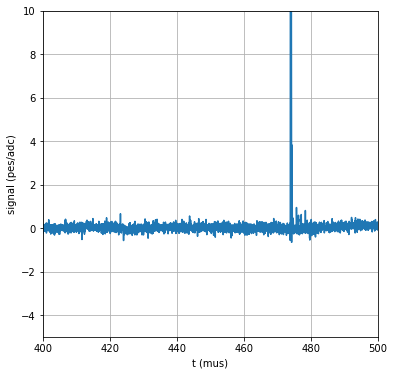

In [58]:
plot_signal_vs_time_mus(epm.csum, 
                            t_min=400, 
                            t_max=500, 
                            signal_min=-5, 
                            signal_max=10)

In [59]:
epm.find_s1()
epm.find_ns1()

number of peaks = 1
S12 number = 0, samples = 13 sum in pes =1722.5195362099785
time vector (mus) = [ 473.9    473.925  473.95   473.975  474.     474.025  474.05   474.075
  474.1    474.125  474.15   474.175  474.2  ]
energy vector (pes) = [  14.08286381   66.17638511  158.51212903  253.12013232  306.16135214
  297.36121824  240.39022366  166.37606052  102.5526914    59.50178028
   33.90383315   16.50250214    7.8783644 ]


11

In [60]:
epm.find_s2()

number of peaks = 1
S12 number = 0, samples = 11 sum in pes =36323.36819947408
time vector (mus) = [ 650.134375    651.1625      652.1625      653.1625      654.1625
  655.1625      656.1625      657.1625      658.1625      659.1625
  660.09017857]
energy vector (pes) = [  230.32418279   847.67667768  2364.22836616  4927.95053337  7211.84954751
  7857.23390397  6363.68171825  3939.86304246  1782.72335323   659.39726547
   138.4396086 ]


1

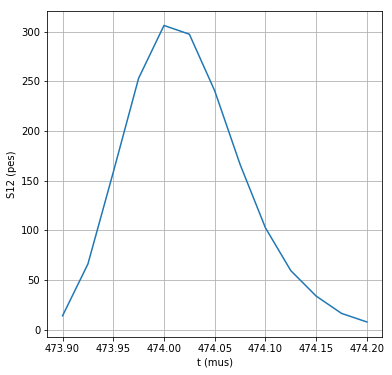

In [61]:
plot_s12(epm.S1)

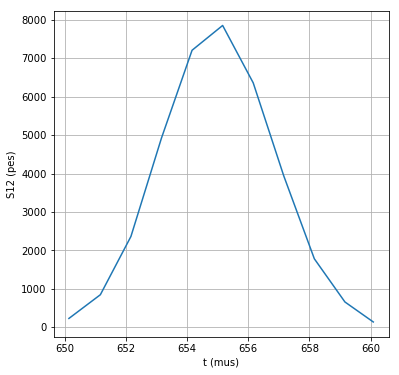

In [62]:
plot_s12(epm.S2)

In [63]:
epm.s1f

{0: S12Features(tmin=473900.0, tmax=474200.0, tpeak=474000.0, etot=1722.5195362099785, epeak=306.16135213734748, width=300.0)}

In [64]:
epm.s2f

{0: S12Features(tmin=650134.375, tmax=660090.17857142852, tpeak=655162.5, etot=36323.368199474076, epeak=7857.2339039658009, width=9955.8035714285215)}

In [65]:
dt = epm.s2f[0].tpeak - epm.s1f[0].tpeak

In [66]:
dt/units.mus

181.16249999999999

In [71]:
def pmp(epm, event, tmin=0, tmax=1300, signal_max=350):
    epm.calibrated_pmt_and_csum(event, pmtrwf)
    
    plot_signal_vs_time_mus(epm.csum, 
                            t_min=tmin, 
                            t_max=tmax, 
                            signal_min=-5, 
                            signal_max=signal_max, figsize=(5,5))

    plt.show()
    
        
    print('+++S1+++++')
    epm.find_s1()
    if len (epm.S1) == 0:
        print('S1 == 0')
        return 0
    
    plot_s12(epm.S1, figsize=(5,5))
    plt.show()
    

    print('+++S2+++++')
    epm.find_s2()
    plot_s12(epm.S2, figsize=(5,5))
    plt.show()
    
    print('s1f = {} '.format(epm.s1f[0]))
    for peak in epm.s2f:
        print('s2f = {} '.format(epm.s2f[peak]))
        dt = epm.s2f[peak].tpeak - epm.s1f[0].tpeak
        print('dt = {} mus'.format(dt/units.mus))
    

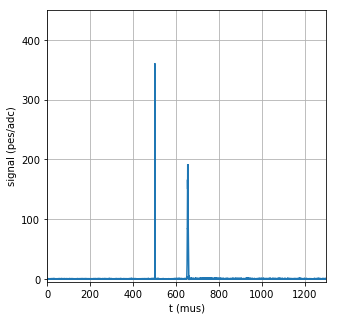

+++S1+++++
number of peaks = 1
S12 number = 0, samples = 14 sum in pes =2065.064253302909
time vector (mus) = [ 501.3    501.325  501.35   501.375  501.4    501.425  501.45   501.475
  501.5    501.525  501.55   501.575  501.6    501.625]
energy vector (pes) = [  19.12029171   82.90246066  193.19925327  303.25835953  360.22944165
  345.95018616  279.24204001  195.38412876  122.43918902   72.64273606
   44.81316229   27.43641449   11.84578833    6.60080135]


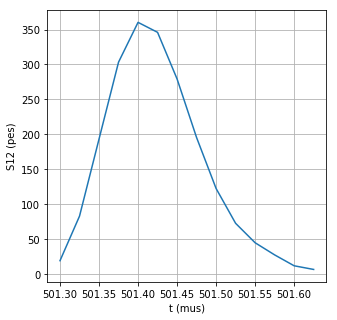

+++S2+++++
number of peaks = 1
S12 number = 0, samples = 10 sum in pes =31145.910841896006
time vector (mus) = [ 650.35125     651.3625      652.3625      653.3625      654.3625
  655.3625      656.3625      657.3625      658.3625      659.43229167]
energy vector (pes) = [  350.34278203  1291.76872785  3429.89503672  5618.42386521  7243.84388007
  6600.30053284  4025.09304068  1897.84940493   579.59037065   108.80320093]


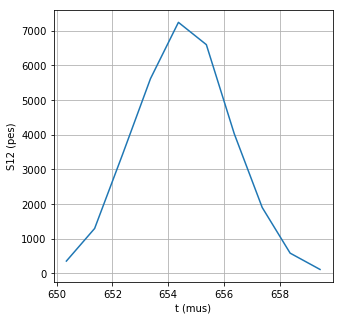

s1f = S12Features(tmin=501300.0, tmax=501625.0, tpeak=501400.0, etot=2065.064253302909, epeak=360.22944164652381, width=325.0) 
s2f = S12Features(tmin=650351.25, tmax=659432.29166666663, tpeak=654362.5, etot=31145.910841896006, epeak=7243.843880068659, width=9081.0416666666279) 
dt = 152.9625 mus


In [93]:
pmp(epm,event=9, tmin=0, tmax=1300, signal_max=450)

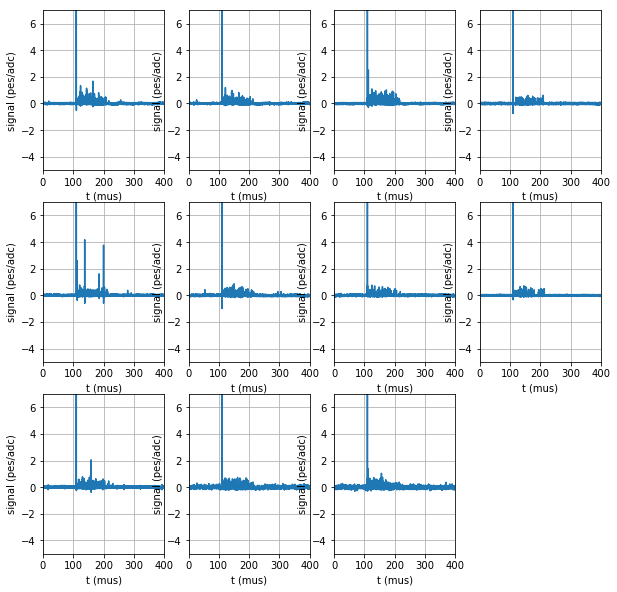

In [88]:
plot_pmt_signals_vs_time_mus(epm.CAL_PMT,
                             epm.P.pmt_active,
                             t_min      =    0,
                             t_max      = 400,
                             signal_min =    -5,
                             signal_max =  7)

In [ ]:
pmp(epm,event=5)

In [ ]:
pmp(epm,event=6)

In [ ]:
pmp(epm,event=8)

In [ ]:
pmp(epm,event=9)